<div style="padding:20px;color:black;margin:0;font-size:350%;text-align:center;display:fill;border-radius:5px;background-color:#aaf0f0;overflow:hidden;font-weight:700;border: 5px solid #21a3a3;">  🧸PlayStore Data Analysis📈</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Create a scatter plot to visualize the relationship between revenue and the number 
of installs for paid apps only. Add a trendline to show the correlation and color-code
the points based on app categories. 

In [62]:
import pandas as pd
import numpy as np
import warnings
from sklearn.pipeline import Pipeline, FunctionTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from collections import Counter
import re
from PIL import Image
from tabulate import tabulate

warnings.filterwarnings('ignore')

In [63]:
# Load data separately
playstore_data = pd.read_csv('../Data Set/Play Store Data.csv')
review_data = pd.read_csv('../Data Set/User Reviews.csv')

In [64]:
playstore_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [65]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [66]:
# Identify the number of null values in each column of Play Store dataset
playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Define preprocessing functions:</font></h4>
</div>

In [67]:
def filter_paid_apps(df):
    return df[df['Type'] == 'Paid'].copy()

In [68]:
def clean_price(df):
    df['Price'] = df['Price'].str.replace('$', '').astype(float)
    return df

In [69]:
def clean_installs(df):
    df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)
    return df

In [70]:
def calculate_revenue(df):
    df['Revenue'] = df['Installs'] * df['Price']
    return df

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Create Preprocessing Pipeline:</font></h4>
</div>

In [71]:
# Create preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('filter_paid_apps', FunctionTransformer(filter_paid_apps)),
    ('clean_price', FunctionTransformer(clean_price)),
    ('clean_installs', FunctionTransformer(clean_installs)),
    ('calculate_revenue', FunctionTransformer(calculate_revenue))
])

In [72]:
# Apply the pipeline to playstore_data
paid_apps = preprocessing_pipeline.transform(playstore_data)

In [73]:
paid_apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 234 to 10798
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    object 
 4   Size            800 non-null    object 
 5   Installs        800 non-null    int64  
 6   Type            800 non-null    object 
 7   Price           800 non-null    float64
 8   Content Rating  800 non-null    object 
 9   Genres          800 non-null    object 
 10  Last Updated    800 non-null    object 
 11  Current Ver     798 non-null    object 
 12  Android Ver     799 non-null    object 
 13  Revenue         800 non-null    float64
dtypes: float64(3), int64(1), object(10)
memory usage: 93.8+ KB


In [74]:
# Check skewness for 'Installs' and 'Revenue'

skew_installs = paid_apps['Installs'].skew ()
skew_revenue = paid_apps['Revenue'].skew ()

print(f"Skewness of Installs: {skew_installs}")
print(f"Skewness of Revenue: {skew_revenue}")

Skewness of Installs: 14.446690263938764
Skewness of Revenue: 15.678274846015881


In [75]:
# Appply logarithimic transformation to reduce skewness

paid_apps['Log_Installs'] = np.log1p (paid_apps['Installs']) # log1p is to handle zero and near-zero values.
paid_apps['Log_Revenue'] = np.log1p (paid_apps['Revenue'])

# Check the skewness again after transformation

skew_log_installs = paid_apps['Log_Installs'].skew ()
skew_log_revenue = paid_apps['Log_Revenue'].skew ()

print(f"Skewness of log_installs: {skew_log_installs}")
print(f"Skewness of log_revenue: {skew_log_revenue}")

Skewness of log_installs: -0.10873177479945148
Skewness of log_revenue: -0.1912368649997245


In [76]:
import statsmodels.api as sm
import plotly.express as px

fig1 = px.scatter(
    paid_apps,     # DataFrame containing only paid apps
    x='Log_Installs', # X-axis: Log-transformed number of installs
    y='Log_Revenue',  # Y-axis: Log-transformed revenue
    color='Category', # Color-code points based on app category
    title='Relationship between Revenue and Number of Installs for Paid Apps', # plot title
    hover_data=['App', 'Price'], # Additional information displayed on hover
    color_discrete_sequence=px.colors.qualitative.Set2, # Custom color palette
    opacity=0.7  # Make overlapping points more visible
)


#-- Manually Compute the Trendline using Ordinary Least Squares (OLS) Regression

# Define independent variable (Log_Installs) and add a constant for regression
X = sm.add_constant(paid_apps['Log_Installs']) 
y = paid_apps['Log_Revenue'] # Define dependent variable (Log_Revenue)

model = sm.OLS(y, X).fit() # Fit an OLS regression model
paid_apps['Trend'] = model.predict(X)  # Predict trendline values using the fitted model


#-- Add single trendline to scatter plot
fig1.add_traces(px.line(
    paid_apps.sort_values(by='Log_Installs'), # Sort by X-axis for smooth trendline
    x='Log_Installs',
    y='Trend'
).data)


#-- Customize plot layout for better appearance
fig1.update_layout(
    width=1100,  # Set the width of the plot
    height=600, # Set the height of the plot
    font_color='grey',      # Set default text color to white
    title_font={'size': 25, 'family': 'Arial', 'color': 'DarkSlateGray'}, # Customize title style
    title_x=0.5,  # Center-align the title
    xaxis=dict(title_font={'size': 12, 'color': 'white'}, showgrid=True, gridcolor='gray', gridwidth=0.2), # Add light gray gridlines
    yaxis=dict(title_font={'size': 12, 'color': 'white'}, showgrid=True, gridcolor='gray', gridwidth=0.2), # Add light gray gridlines
    xaxis_title='Number of Installs',
    yaxis_title='Revenue (USD)'
)

#-- Customize Scatter Points Appearance
fig1.update_traces(marker=dict(size=12, line=dict(width=1, color='DarkSlateGray'))) # Set the size of scatter points & Add border around points

# Show the plot
fig1.show()

<div class="alert alert-block alert-warning">  
<b>Warning:</b> Plotly interactive plots only appear after running the cells.  
</div> 

<img src="../Images/task_01.png" alt="Description">

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Generate a word cloud for the most frequent keywords found in 5-star reviews, but 
exclude common stopwords and app names. Additionally, filter the reviews to include 
only those from apps in the "Health & Fitness" category. 

In [77]:
# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mebub_9a7jdi8\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [78]:
# Merging the datasets to include app category in the review data
merged_data = pd.merge(review_data, playstore_data[['App', 'Category']], on='App', how='left')

In [79]:
# Filter reviews
filtered_reviews = merged_data[
    (merged_data['Sentiment_Polarity'] == 1.0) & 
    (merged_data['Category'] == 'HEALTH_AND_FITNESS')
]

In [80]:
# Get health & fitness app names
health_fitness_apps = playstore_data[playstore_data['Category'] == 'HEALTH_AND_FITNESS']['App'].unique()

In [81]:
# Basic stopwords list
stop_words = {
    'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from', 'has', 'he',
    'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the', 'to', 'was', 'were',
    'will', 'with', 'app', 'apps', 'use', 'using', 'get', 'got', 'one', 'really',
    'like', 'good', 'great', 'best', 'love', 'thank', 'thanks', 'amazing',
    'awesome', 'excellent', 'would', 'much', 'many', 'since', 'also', 'very',
    'way', 'well', 'far', 'can', 'could', 'should', 'this', 'that', 'they',
    'i', 'im', "i'm", 'ive', "i've", 'just', 'makes', 'made', 'make'
}

In [82]:
def preprocess_text(text, app_names):
    # Convert to lowercase
    text = text.lower()
    
    # Remove app names
    for app_name in app_names:
        text = text.replace(app_name.lower(), '')
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    
    return text

In [83]:
# Preprocess all reviews
processed_text = " ".join(
    preprocess_text(review, health_fitness_apps)
    for review in filtered_reviews['Translated_Review'].dropna()
)

# Custom color function for health/fitness theme
def health_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    health_colors = ['#640d5f',
              '#be3144', 
              '#5c7285',
              '#872341', 
              '#4635b1']  
    return np.random.choice(health_colors)

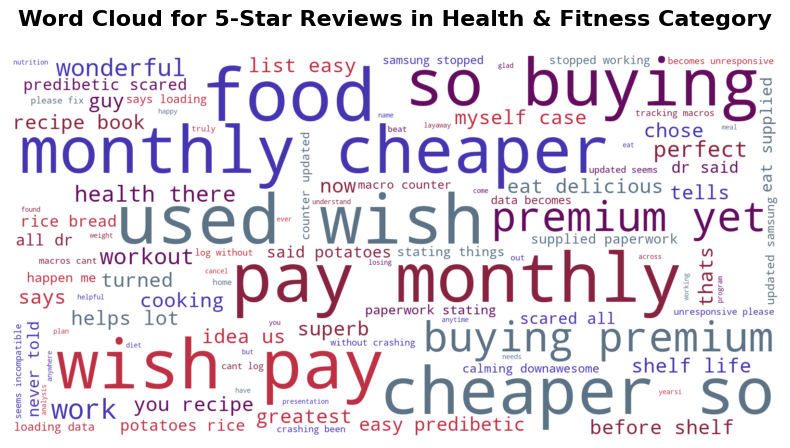


Most frequent words and their counts:
used: 26
wish: 25
pay: 25
monthly: 25
cheaper: 25
buying: 25
premium: 25
yet: 25
food: 16
foods: 12
eat: 10
updated: 8
says: 8
wonderful: 6
you: 6
said: 6
works: 6
working: 6
cant: 5
health: 5


In [84]:
# Generate the word cloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    color_func=health_color_func,
    min_font_size=10,
    max_font_size=150,
    random_state=42,
    collocations=True,
    normalize_plurals=True,
    margin=10,
).generate(processed_text)

# Create the plot
plt.figure(figsize=(10, 5), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews in Health & Fitness Category', 
          fontsize=16, 
          pad=20, 
          fontweight='bold')

# Save with high DPI
plt.savefig('health_fitness_wordcloud.png', 
            dpi=300, 
            bbox_inches='tight', 
            facecolor='white')
plt.show()

# Print most common words and their frequencies
words = [word for word in processed_text.split() if word not in stop_words and len(word) > 2]
word_freq = Counter(words).most_common(20)
print("\nMost frequent words and their counts:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

<div style="border-radius:10px; border:green solid; padding: 5px; height: 50px; background-color: white; font-size:150%; text-align:left">
  <h4 align="center"><font color='blue'>💡 Using mask</font></h4>
</div>

In [85]:
mask = np.array(Image.open('../Images/man.jpg')) # Load the image as a numpy array

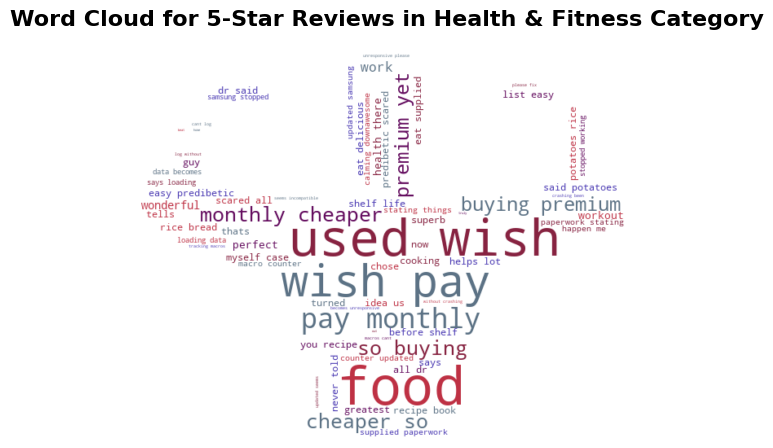

In [86]:
# Generate the word cloud with the image mask
wordcloud = WordCloud(
    width=1600, # Set the width of the canvas
    height=800, # Set the height of the canvas
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    color_func=health_color_func,# Use the custom color function
    random_state=42,
    collocations=True, # Detect bigrams or trigrams
    normalize_plurals=True, # Normalize plurals
    mask=mask # Use the image mask
).generate(processed_text)

# Create the plot
plt.figure(figsize=(10, 5), facecolor='white')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for 5-Star Reviews in Health & Fitness Category', 
          fontsize=16, 
          pad=20, 
          fontweight='bold')

# # Save with high DPI
# plt.savefig('health_fitness_wordcloud.png', 
#             dpi=300, # High DPI 
#             bbox_inches='tight', 
#             facecolor='white')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Visualize the sentiment distribution (positive, neutral, negative) of user reviews 
using a stacked bar chart, segmented by rating groups (e.g., 1-2 stars, 3-4 stars, 4-5
stars). Include only apps with more than 1,000 reviews and group by the top 5 
categories.

In [87]:
# Filter apps with more than 1,000 reviews
playstore_data['Reviews'] = pd.to_numeric(playstore_data['Reviews'], errors='coerce')
playstore_filtered = playstore_data[playstore_data['Reviews'] > 1000]

# Get top 5 categories by number of apps
top_categories = playstore_filtered['Category'].value_counts().head(5).index
playstore_filtered = playstore_filtered[playstore_filtered['Category'].isin(top_categories)]

# Merge datasets on 'App' column
merged_data_02 = pd.merge(review_data, playstore_filtered, on='App')

# Remove rows with NaN sentiment values
merged_data_02 = merged_data_02.dropna(subset=['Sentiment'])

# Create rating groups
merged_data_02['Rating_Group'] = pd.cut(merged_data_02['Rating'], bins=[0, 2, 4, 5], labels=['1-2 stars', '3-4 stars', '4-5 stars'])

# Aggregate sentiment counts by rating group and category
sentiment_counts = merged_data_02.groupby(['Category', 'Rating_Group', 'Sentiment']).size().unstack(fill_value=0).reset_index()

# Melt the data to long format for Plotly
sentiment_melted = pd.melt(sentiment_counts, id_vars=['Category', 'Rating_Group'], var_name='Sentiment', value_name='Count')

In [88]:
# Create the Plotly stacked bar chart
fig = px.bar(sentiment_melted, x='Rating_Group', y='Count', color='Sentiment',
             facet_col='Category', barmode='stack', text='Count',
             color_discrete_map={'Positive': '#2ca02c', 'Neutral': '#ff7f0e', 'Negative': '#d62728'},
             labels={'Rating_Group': 'Rating Groups', 'Count': 'Review Count'},
             title='Sentiment Distribution by Rating Groups (Top 5 Categories)')

# Update layout for better readability
fig.update_layout(height=700, width=1000, title_x=0.5, 
                  xaxis_title='Rating Groups', yaxis_title='Review Count',
                  legend_title_text='Sentiment',
                  font=dict(size=12))

fig.show()

<div class="alert alert-block alert-warning">  
<b>Warning:</b> Plotly interactive plots only appear after running the cells.  
</div> 

<img src="../Images/task_03.png" alt="Description">

In [89]:
# Group by category, rating group, and sentiment to show total counts
sentiment_summary = sentiment_melted.groupby(['Category', 'Rating_Group', 'Sentiment'])['Count'].sum().reset_index()

In [93]:
print(tabulate(sentiment_summary, headers='keys', tablefmt="fancy_grid")) # Display the summary table

╒════╤══════════════╤════════════════╤═════════════╤═════════╕
│    │ Category     │ Rating_Group   │ Sentiment   │   Count │
╞════╪══════════════╪════════════════╪═════════════╪═════════╡
│  0 │ FAMILY       │ 1-2 stars      │ Negative    │       0 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  1 │ FAMILY       │ 1-2 stars      │ Neutral     │       0 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  2 │ FAMILY       │ 1-2 stars      │ Positive    │       0 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  3 │ FAMILY       │ 3-4 stars      │ Negative    │     120 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  4 │ FAMILY       │ 3-4 stars      │ Neutral     │      67 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  5 │ FAMILY       │ 3-4 stars      │ Positive    │     196 │
├────┼──────────────┼────────────────┼─────────────┼─────────┤
│  6 │ FAMILY       │ 4-5 stars      │ Negative    │   

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Create an interactive choropleth map using Plotly to visualize global installs by 
categories . Apply filters to show data for only the top 5 app categories and highlight
categories where the number of installs exceeds 1 million and App category should not
start with character “A” , “C” , “G” and “S” . this graph should work only between 
6PM IST to 8 PM IST apart from that time we should not show this graph in dashboard 
itself.

In [94]:
# Replace 'Free' with 0 and remove other non-numeric characters like "+" and ","
playstore_data['Installs'] = playstore_data['Installs'].replace('Free', '0')
playstore_data['Installs'] = playstore_data['Installs'].replace({'\+': '', ',': ''}, regex=True)

# Convert the 'Installs' column to numeric, coercing errors (e.g., invalid entries will become NaN)
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'], errors='coerce')

# Drop rows where 'Installs' is NaN
playstore_data = playstore_data.dropna(subset=['Installs'])

# Filter out categories that start with 'A', 'C', 'G', or 'S'
filtered_data = playstore_data[~playstore_data['Category'].str.startswith(('A', 'C', 'G', 'S'))]

# Filter categories with more than 1 million installs
filtered_data = filtered_data[filtered_data['Installs'] > 1000000]

# Get the top 5 categories by the number of apps
top_categories = filtered_data['Category'].value_counts().head(5).index
filtered_data = filtered_data[filtered_data['Category'].isin(top_categories)]

<div class="alert alert-block alert-danger">  
<b>Warning:</b> Since there is no country data in the dataset, we leave the map blank and indicate the issue.  
</div>

In [96]:
fig = px.choropleth(
    locations=[],  # No data for locations
    locationmode='country names',
    title="Global App Installs by Category (Country data unavailable)" # Title of the plot
)

# Update layout to show that no data is available
fig.update_layout(
    geo=dict(
        showframe=False,# Hide the frame
        showcoastlines=False,# Hide the coastlines
        projection_type='equirectangular'
    ),
    title_x=0.5,
    annotations=[
        dict(
            x=0.5, # Center the title
            y=0.5, # Center the title
            text="No country data available in the dataset.",
            showarrow=False,
            font=dict(size=20, color="red"), # Increase font size and make it red
            xref="paper", # Position the text relative to the paper
            yref="paper" # Position the text relative to the paper
        )
    ]
)

fig.show()

<div class="alert alert-block alert-warning">  
<b>Warning:</b> Plotly interactive plots only appear after running the cells.  
</div> 

<img src="../Images/global_installation.png" alt="Description">

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #7FFFD4; font-size:100%; text-align:left">

<!-- <h3 align="center"><font color='#DAA520'>💡 1st Task:</font></h3> -->
    

🪼 Create a dual-axis chart comparing the average installs and revenue for free vs. 
paid apps within the top 3 app categories. Apply filters to exclude apps with fewer 
than 10,000 installs and revenue below $10,000 and android version should be more 
than 4.0 as well as size should be more than 15M and content rating should be Everyone
and app name should not have more than 30 characters including space and special 
character .this graph should work only between 1 PM IST to 2 PM IST apart from that 
time we should not show this graph in dashboard itself.